Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lyubomira Dimitrova"
COLLABORATORS = "Maryna Charniuk, Dung Nguyen(SPANKUS)"

---

# Aufgabe 1 - Kürzeste Wege mit Dijkstra's Algorithmus (40 Punkte)

Für diese Aufgabe benötigen Sie das File "entfernungen.json" mit 154 deutschen Städten, ihren Koordinaten, sowie den Straßenentfernungen zu umliegenden Städten:   

```json
{
    "Name der Stadt": {
        "Koordinaten":  {
            "Breite":  "50N47",
            "Länge":   "06E05"
        },
        "Nachbarn":  {
            "Nachbarstadt_1": 16.8,
            "Nachbarstadt_2": 32.4,
            ...
        }
    },
    ...
}
 ```
Die Koordinaten sind als Geokoordinaten mit Breiten- und Längengrad (hier: 50° 47 Minuten Nord, 6° 5 Minuten Ost), die Nachbarstädte mit Entfernungsangabe in Kilometern angegeben.   

a) **(8 Pkt.)**  
Implementieren Sie eine Funktion  

```python
graph, names, weights = createGraph(distanceDict)  
```
    
die aus den Entfernungsdaten einen gewichteten Graphen generiert. Dabei ist **distanceDict** das Dictionary, das Sie aus dem File eingelesen haben. **graph** ist die Adjazenzliste des Graphen, **names** ist eine property map, die jeder Knotennummer den jeweiligen Städtenamen zuordnet, und  **weights** eine property map, die die Kantengewichte speichert, so dass **weights[(i,j)]** das Gewicht der Kante von Knoten *i* nach Knoten *j* angibt.

In [2]:
import json

def readfile(filename):
    with open(filename, encoding = 'utf-8') as d:
        data = json.load(d)
    return data

def createGraph(distanceDict):
    """
    Note: In order to past the auto-tests, please use city name as key and node number as value in the dict names.
    Also, please make the values (node numbers) as range(graph)

    Arguments:
    distanceDict -- the dictionary you have read from the file

    Returns:
    graph -- the adjacency list of the graph
    names -- the dictionary that maps each node number to the respective city name, as {city name : node number}
    weights -- the dictionary that stores the edge weights, as {(0, 32): 32.4}
    
    """
    names = {city_name : node_number for node_number, city_name in enumerate(distanceDict)}
    
    #jedes Element in der Liste 'graph' ist eine Liste von Zahlen
    graph = [[names[neighbor] for neighbor in city_name['Nachbarn']] 
             for city_name in distanceDict.values()]
    
    weights = {}

    for city in distanceDict:
        neighbors = distanceDict[city]['Nachbarn']
        for n in neighbors:
            weights[(names[city], names[n])] = neighbors[n]
            weights[(names[n], names[city])] = neighbors[n]
            
    return graph, names, weights


In [3]:
distanceDict = readfile('entfernungen.json')
graph, names, weights = createGraph(distanceDict)

for city in ['Aachen', 'Bayreuth', 'Duisburg', 'Görlitz', 'Wiesbaden']:
    graphItm = graph[names[city]] 
    graphItm2 = []
    for i, j in distanceDict[city]['Nachbarn'].items():
        graphItm2.append(names[i])
        assert weights[(names[city],names[i])] == j
        assert weights[(names[i],names[city])] == j
    assert graphItm == graphItm2
    

b) **(20 Pkt.)**  
Verwenden Sie Dijkstras Algorithmus, um die kürzesten Wege und die Straßenentfernung zwischen

1. Aachen und Passau
2. Saarbrücken und Leipzig
3. München und Greifswald
4. Konstanz und Kassel

zu bestimmen. Implementieren Sie zu diesem Zweck eine Funktion  

```python
    path, distance = dijkstra(graph, weights, start, destination)  
```
    
die den Weg als Folge von Kanten (jeweils mit Anfangs-, Endknoten sowie Entfernung) und die Gesamtentfernung zurückgibt. Verwenden Sie dann die property map **names** aus a), um den Pfad in die Darstellung "Startstadt => x km => Stadt2 => y km => Stadt3 => … => Zielstadt (insgesamt: z km)" umzuwandeln.  

In [4]:
import sys
from math import inf
import heapq

          
def dijkstra(graph, weights, names, start, destination):
    
    """
    Arguments:
    graph -- the adjacency list of the graph
    names -- the dictionary that maps each node number to the respective city name, as {city name : node number}
    weights -- the dictionary that stores the edge weights, as {(0, 32): 32.4}
    start -- str, such as 'Aachen'
    destination -- str, such as 'Euskirchen'

    Returns:
    path -- str, such as 'Aachen => 32.4 km => Düren => 30.0 km => Euskirchen (total: 62.4 km)'
    distance -- such as 62.4
    
    """
    # initialize
    n = len(graph)
    st = names[start]
    distances = [inf] * n
    distances[st] = 0
    parents = [None] * n
    
    # start heap
    heap = []
    for neighbor in graph[st]:
        heapq.heappush(heap, (weights[(st, neighbor)], st, neighbor))
        distances[neighbor] = weights[(st, neighbor)]       # we have to start somewhere
        parents[neighbor] = st
    
    while len(heap) > 0:
        w, parent, node = heapq.heappop(heap)    # get the node closest to the start
        for neighbor in graph[node]:
            d = distances[node] + weights[(node, neighbor)]
            if d < distances[neighbor]:
                distances[neighbor] = d
                parents[neighbor] = node
                heapq.heappush(heap, (weights[(node, neighbor)], node, neighbor))
            
    # distance
    dest = names[destination]    # the node number of the destination node
    distance = distances[dest]
    
    # pretty path
    path = ' (total: {:.1f} km)'.format(distance)    # start at the end of the string
    
    while parents[dest] is not None:  # until the start node is reached (its parent is None)
        city_name = next(name for name in names if names[name] == dest)
        path = ' => {} km => {}'.format(weights[(dest, parents[dest])], city_name) + path   # expand from the beginning
        dest = parents[dest]
    path = start + path

    return path, distance


In [5]:
path, distance = dijkstra(graph, weights, names, 'Aachen', 'Passau')
print(path)
assert round(distance,1) == 708.0
print('--------')
path, distance = dijkstra(graph, weights, names, 'Saarbrücken', 'Leipzig')
print(path)
assert round(distance,1) == 565.2
print('--------')
path, distance = dijkstra(graph, weights, names, 'München', 'Greifswald')
print(path)
assert round(distance,1) == 854.4
print('--------')
path, distance = dijkstra(graph, weights, names, 'Konstanz', 'Kassel')
print(path)
assert round(distance,1) == 536.4

Aachen => 32.4 km => Düren => 30.0 km => Euskirchen => 64.8 km => Neuwied => 15.6 km => Koblenz => 97.2 km => Frankfurt (Main) => 19.2 km => Hanau => 98.4 km => Würzburg => 94.8 km => Erlangen => 121.2 km => Regensburg => 134.4 km => Passau (total: 708.0 km)
--------
Saarbrücken => 70.8 km => Kaiserslautern => 57.6 km => Worms => 39.6 km => Darmstadt => 40.8 km => Hanau => 84.0 km => Fulda => 79.2 km => Eisenach => 60.0 km => Erfurt => 45.6 km => Jena => 87.6 km => Leipzig (total: 565.2 km)
--------
München => 82.8 km => Ingolstadt => 96.0 km => Nürnberg => 79.2 km => Bayreuth => 56.4 km => Hof => 30.0 km => Plauen => 48.0 km => Gera => 70.8 km => Leipzig => 148.8 km => Potsdam => 31.2 km => Berlin => 140.4 km => Neubrandenburg => 70.8 km => Greifswald (total: 854.4 km)
--------
Konstanz => 115.2 km => Tübingen => 21.6 km => Sindelfingen => 36.0 km => Pforzheim => 31.2 km => Karlsruhe => 43.2 km => Speyer => 20.4 km => Mannheim => 52.8 km => Darmstadt => 32.4 km => Frankfurt (Main) => 

b) **(12 Pkt.)**  

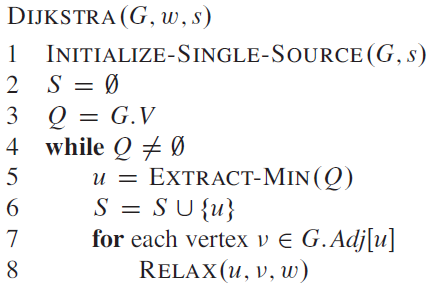

Die oben gegebene Implementierung des Dijkstra-Algorithmus zeigt die Variante mit Prioritätswarteschlange.
1. **(2 Pkt.)** Welche Zeitkomplexität hat der angegebene Algorithmus?
2. **(2 Pkt.)** Angenommen wir ändern der Algorithmus in Zeile 4 zu `while |Q| > 1:`, wodurch die äußere Schleife nur noch $n-1$ Mal durchlaufen wird. Ist diese Änderung korrekt? Erklären Sie Ihre Antwort.
3. **(4 Pkt.)** Sei $G=\left(V,E\right)$ ein gerichteter, gewichteter Graph mit nicht-negativen Gewichten für die gilt: $w: E \to \lbrace0, 1, \dots, W\rbrace$. Ändern Sie den Dijkstra-Algorithmus so, dass die der kürzeste Pfad zu $s$ in $O\left(WV+E\right)$ gefunden werden kann.
3. **(4 Pkt.)** Unter derselben Annahme: Modifizieren Sie Ihre Implementierung der Vorherigen Aufgabe so, dass sie eine Laufzeitkomplexität von $O\left(\left(V+E\right)\lg W\right)$ erreichen.

***Anmerkung zu 3 und 4: Eine ausführliche Beschreibung ist ausreichend***

Sei n = |V| und m = |E|

1. $O(m + n log n)$

   Alle Knoten werden in die Queue aufgenommen, also len(Q) = n => wird die while-Schleife n-mal ausgeführt.
   Die RELAX-Funktion wird für jede Kante einmal ausgeführt, also m Mal insgesamt.
   EXTRACT-MIN (eigentlich das gleiche wie deleteMin), benötigt $O(log n)$, und wird in jeder Iteration der while-Schleife ausgeführt.
   
2. 
   